# Progress Report: [Blog-Sentiment Analysis](https://github.com/Data-Science-for-Linguists-2019/Blog-Sentiment-Analysis)
## Table of Contents


In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [2]:
dir = '/users/eva/Documents/Data_Science/Blog-Sentiment-Analysis/'

In [3]:
blogdata = pd.read_csv(dir + 'data/blogtext.csv')

In [4]:
blogdata.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [5]:
newcolumns = ['id', 'gender', 'age', 'industry', 'sign', 'date', 'text']
blogdata.columns = newcolumns
blogdata.head(3)

,id,gender,age,industry,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...


## Overview

In [8]:
blogdata_per_blogger = blogdata.groupby('id')

In [10]:
blogdata_per_blogger['gender'].value_counts()

id       gender
5114     male       197
7596     male        14
8173     male      1007
8349     male        70
9289     male        89
9470     male       360
11253    male         7
11762    female      20
15365    female     844
17944    female     128
21828    male        69
23166    female       1
23191    female       5
23676    male        12
24336    male       849
26357    male        41
27603    male        52
28417    female      73
28451    male        13
40964    female       5
46465    male        19
47519    male       179
48428    female       5
48923    female     128
49663    male      1252
61176    male         3
63420    male        26
64145    male       204
66895    female      18
67459    male        27
                   ... 
4330772  female       3
4331205  male         1
4331261  male         4
4331320  male         6
4331590  female       1
4331863  male         2
4332271  male         1
4332352  male         3
4332599  female       1
4333053  female       1


In [13]:
len(blogdata)

681284

In [15]:
len(blogdata.id.value_counts())

19320

In [11]:
per_blogger = blogdata.drop_duplicates("id")

In [12]:
len(per_blogger)

19320

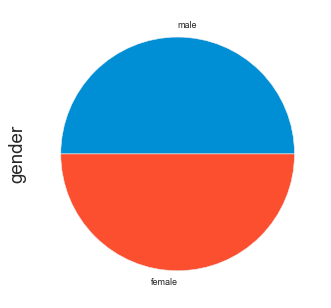

In [107]:
per_blogger.gender.value_counts().plot(kind="pie")

In [25]:
per_blogger.gender.value_counts(normalize=True)

male      0.5
female    0.5
Name: gender, dtype: float64

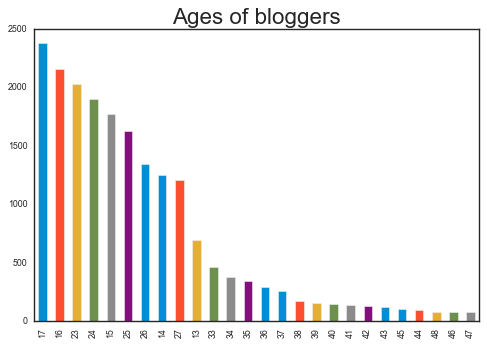

In [108]:
per_blogger.age.value_counts().plot(kind='bar',title='Ages of bloggers')

In [24]:
per_blogger.age.describe()

count    19320.000000
mean        22.833799
std          7.975490
min         13.000000
25%         16.000000
50%         23.000000
75%         26.000000
max         48.000000
Name: age, dtype: float64

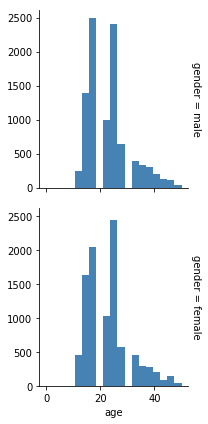

In [60]:
g = sns.FacetGrid(per_blogger, row="gender", margin_titles=True)
bins = np.linspace(0, 50, 20)
g.map(plt.hist, "age", color="steelblue", bins=bins)

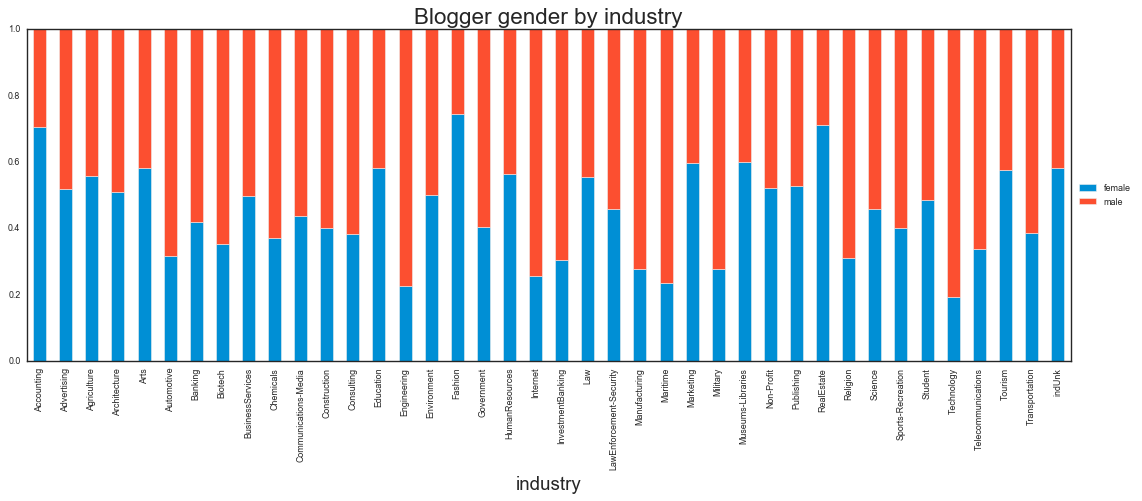

In [106]:
plt.style.use('seaborn-white')
industry_by_gender = per_blogger.groupby('industry').gender.value_counts(normalize=True)
industry_by_gender.unstack(level=1).plot.bar(figsize=(15,5), stacked=True, title="Blogger gender by industry")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [1]:
age_by_gender = per_blogger.groupby('age').gender.value_counts(normalize=True)
age_by_gender.unstack(level=1).plot.bar(figsize=(15,5), stacked=True, title="Blogger gender by age")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

NameError: name 'per_blogger' is not defined

In [80]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


# Data analysis
### Goals of my analysis
There are three things I would like to investigate in this data. 
1. Word frequencies
2. Blog topics
3. Blog sentiment

In this section, I will begin investigating all three, and hopefully get an idea of analyses to further explore.
## Data analysis: Word frequencies
### Methods

## Data analysis: Topic clustering
I would like to look at what topics are discussed in different blogs, and whether those topics vary according to demographic group. I imagine the topics will be have clear differences when grouped by blogger industry, though even within industry blogs may vary widely - just because two people both work in "Banking" does not mean they both blog about banking.

I did not originally intend to look at blog topics, but I have been reading a lot about topic modelling and it is really interesting to me. I wanted to give it a try using this data.
### Methods
I have absolutely no interest in going through all or even a portion of the 681,000 blogs in this dataset and hand-labelling them for topics. So, supervised learning is not going to work here. I am going to try my hand at unsupervised learning. Specifically, I am going to try **Latent Dirichlet allocation (LDA)** using scikit-learn. LDA performs topic detection on large, unlabelled document sets. In order to use LDA, I need to convert the texts to vectors. 

I learned this model from the DataCamp project ["The Hottest Topics in Machine Learning"](https://projects.datacamp.com/projects/158). I edited the code in that tutorial to fit my own data.
### Preprocessing the data
First, I'm going to remove punctuation and lowercase all blog texts. Then, I will convert the blog texts into vectors.

In [6]:
print(blogdata['text'].head())

0               Info has been found (+/- 100 pages,...
1               These are the team members:   Drewe...
2               In het kader van kernfusie op aarde...
3                     testing!!!  testing!!!          
4                 Thanks to Yahoo!'s Toolbar I can ...
Name: text, dtype: object


In [7]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [8]:
# Remove punctuation
blogdata['text_processed'] = blogdata['text'].map(lambda x: re.sub('[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]', '', x))

# Lowercase
blogdata['text_processed'] = blogdata['text_processed'].map(lambda x: x.lower())

# Remove extra white space. Not sure if it messes with the vectorization process in any way but just to be sure
blogdata['text_processed'] = blogdata['text_processed'].map(lambda x: ' '.join(x.split()))

print(blogdata['text_processed'].head())

0    info has been found 100 pages and 45 mb of pdf...
1    these are the team members drewes van der laag...
2    in het kader van kernfusie op aarde maak je ei...
3                                      testing testing
4    thanks to yahoos toolbar i can now capture the...
Name: text_processed, dtype: object


In [13]:
# I originally did this with CountVectorizer but it didn't load, leaving this code in just in case

# from sklearn.feature_extraction.text import CountVectorizer
# Create count vectorizer with English stop words
# count_vectorizer = CountVectorizer(max_features=500, stop_words = "english")
# blog_vec = count_vectorizer.fit_transform(blogdata['text_processed'])

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, max_features = 1500, stop_words='english') 

In [10]:
blog_tfidf = tfidf_vectorizer.fit_transform(blogdata['text_processed'])

In [11]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

def print_topics(model, tfidf_vectorizer, n_top_words):
    words = tfidf_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Picking number of topics and number of words
number_topics = 50
number_words = 5

lda = LDA(n_components=number_topics)
lda.fit(blog_tfidf)

Topics found via LDA:


NameError: name 'count_vectorizer' is not defined

In [12]:
print("Topics found via LDA:")
print_topics(lda, tfidf_vectorizer, number_words)

Topics found via LDA:

Topic #0:
na la ko sa da

Topic #1:
snow exam weather ben cold

Topic #2:
youre dont like im just

Topic #3:
urllink google search information art

Topic #4:
dont im just know want

Topic #5:
love life know heart just

Topic #6:
school class im teacher just

Topic #7:
book read books reading im

Topic #8:
pm break spring im ah

Topic #9:
site urllink page web website

Topic #10:
wedding beach im apartment lake

Topic #11:
baby women dave child woman

Topic #12:
god jesus lord life christ

Topic #13:
birthday happy party day im

Topic #14:
dun den juz wat tt

Topic #15:
movie movies film watch urllink

Topic #16:
test don questions ve question

Topic #17:
car road bike just driving

Topic #18:
hair black color red like

Topic #19:
hello dance kiss fly say

Topic #20:
im boring nick going really

Topic #21:
dad mom im paul just

Topic #22:
bush urllink kerry war president

Topic #23:
dog photos dogs concert tickets

Topic #24:
lol im like ur gonna

Topic #25:
bye w

Some topics and my thoughts:

+ **Topic #11: baby women dave child woman**
  + What. What is this.
+ **Topic #12: god jesus lord life christ**
  + Found the Christian bloggers.
+ **Topic #14: dun den juz wat tt**
  + I *think* this might actually be early 2000s textspeak, and I am super excited the model clustered these together.
+ **Topic #17: car road bike just driving**
  + ... transportation bloggers?
+ **Topic #20: im boring nick going really** & also **Topic #21: dad mom im paul just**
  + Here's what confuses me: Some of these have NAMES in them. How is that possible? How can the model cluster 682k blogs and have top words include people's names? Maybe I should find some way to exclude names from the data, because they might be clustering blogs that otherwise have nothing to do with each other.
+ **Topic #22: bush urllink kerry war president**
  + Found the political bloggers.
+ **Topic #23: dog photos dogs concert tickets**
  + These bloggers live a simple life: they love dogs and concerts. I respect that.
+ **Topic #24: lol im like ur gonna**
  + More! teen! bloggers! (I think.)
+ **Topic #27: fucking fuck shit im like**
  + People who curse a lot!
+ **Topic #30: eyes like just sun sky**
  + Poets?
+ **Topic #38: ha haha hi im oh**
  + More teens? Adults who use haha too much? 
+ **Topic #39: cheese 12 chocolate cream like**
  + Found the food bloggers.
+ **Topic #47: sleep im bed tired night**
  + Me currently. Also probably me in 2004.
  
#### Things I should change

I'm going to hold on off on changing the model / preprocessed text, since that took around 35 minutes to load and made my computer approximately twice as hot as the sun. But when I re-do this, I will: remove urllink, since it is not useful; use a better tokenizer, there are way too many tokens of "im"; figure out if I can remove non-English text without completely removing multilingual blogs. One cluster seems to be entirely non-English blogs: **Topic #0:
na la ko sa da***.